In [1]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-1-961ba613f12c>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
# 데이터 가져오기
file_path = './boston.csv'
bost = pd.read_csv(file_path)
print(bost.columns)

# medv 종속변수 1개
# 독립변수 13개

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [2]:
bost.head()

In [3]:
bost.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
# 독립(indeopen) 13개, 종속(deopen) 1개 / 속성을 대문자를 소문자로 써도 상관없음
indeopen = bost[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
deopen = bost[['medv']]
print(indeopen.shape)
print(deopen.shape)

(506, 13)
(506, 1)


In [5]:
# 모델의 구조 만듦!
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [6]:
# 데이터로 모델 학습(FIT)
# model.fit(indeopen, deopen, epochs = 500, verbose = 0) # verbose 0는 epochs 돌아가는 게 안 보인다.
model.fit(indeopen, deopen, epochs = 1500)

Epoch 1/1500
16/16 [==============================] - 0s 2ms/step - loss: 55643.8359
Epoch 2/1500
16/16 [==============================] - 0s 2ms/step - loss: 47999.2812
Epoch 3/1500
16/16 [==============================] - 0s 2ms/step - loss: 41836.4375
Epoch 4/1500
16/16 [==============================] - 0s 2ms/step - loss: 36256.4648
Epoch 5/1500
16/16 [==============================] - 0s 2ms/step - loss: 31134.8340
Epoch 6/1500
16/16 [==============================] - 0s 2ms/step - loss: 26449.3301
Epoch 7/1500
16/16 [==============================] - 0s 2ms/step - loss: 22160.7422
Epoch 8/1500
16/16 [==============================] - 0s 2ms/step - loss: 18286.0352
Epoch 9/1500
16/16 [==============================] - 0s 2ms/step - loss: 14831.5459
Epoch 10/1500
16/16 [==============================] - 0s 2ms/step - loss: 11786.9541
Epoch 11/1500
16/16 [==============================] - 0s 2ms/step - loss: 9135.0068
Epoch 12/1500
16/16 [==============================] - 0s 3ms/st

In [7]:
# 모델 사용 (predict value)
model.predict(indeopen[0:5])  # 우리의 예측값

1/1 [==============================] - 0s 163ms/step


array([[30.273386],
       [25.237083],
       [31.282852],
       [30.38488 ],
       [29.846437]], dtype=float32)

In [8]:
# 실제 csv 값의 종속값
deopen[0:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
# 모델 수식 확인
model.get_weights()

[array([[-9.1275781e-02],
        [ 6.4434610e-02],
        [-5.4368597e-02],
        [ 3.2196918e+00],
        [ 2.2784927e+00],
        [ 4.5158081e+00],
        [ 3.5611077e-03],
        [-9.5490223e-01],
        [ 1.6268116e-01],
        [-9.3286252e-03],
        [-1.6938959e-01],
        [ 1.5870269e-02],
        [-5.3300834e-01]], dtype=float32),
 array([3.541554], dtype=float32)]

In [ ]:
# 실제로 사용되는 공식 (bhp = boston housing price)

'''bhp = -9.1603890e-02 * crim +
       6.1031673e-02 * zn +
      -5.0573904e-02 * indus +
       3.1523666e+00 * chas +
       1.4714948e+00 * nox +
       4.6555619e+00 * rm +
      -2.8746166e-05 * age +
      -9.7315133e-01 * dis +
       1.6093647e-01 * rad +
      -1.0838014e-02 * tax +
      -1.9352242e-01 * ptratio +
       1.4223248e-02 * b +
      -5.2187192e-01 * lstat +
      3.4369934'''

In [9]:
# 속성 줄이기
indeopen = bost[['crim', 'zn', 'rm', 'dis', 'ptratio', 'lstat']]
deopen = bost[['medv']]
print(indeopen.shape)
print(deopen.shape)

(506, 6)
(506, 1)


In [11]:
# 모델의 구조 만듦!
X = tf.keras.layers.Input(shape=[6])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [12]:
# 데이터로 모델 학습(FIT)
model.fit(indeopen, deopen, epochs = 1500)


Epoch 1/1500
16/16 [==============================] - 1s 2ms/step - loss: 514.2131
Epoch 2/1500
16/16 [==============================] - 0s 2ms/step - loss: 488.8553
Epoch 3/1500
16/16 [==============================] - 0s 2ms/step - loss: 468.3774
Epoch 4/1500
16/16 [==============================] - 0s 3ms/step - loss: 449.3531
Epoch 5/1500
16/16 [==============================] - 0s 3ms/step - loss: 431.7021
Epoch 6/1500
16/16 [==============================] - 0s 3ms/step - loss: 415.3035
Epoch 7/1500
16/16 [==============================] - 0s 3ms/step - loss: 399.1884
Epoch 8/1500
16/16 [==============================] - 0s 2ms/step - loss: 383.9485
Epoch 9/1500
16/16 [==============================] - 0s 2ms/step - loss: 369.8685
Epoch 10/1500
16/16 [==============================] - 0s 2ms/step - loss: 356.6882
Epoch 11/1500
16/16 [==============================] - 0s 2ms/step - loss: 344.5297
Epoch 12/1500
16/16 [==============================] - 0s 2ms/step - loss: 333.2810
E

In [13]:
# 모델 사용 (predict value)
model.predict(indeopen[0:5])  # 우리의 예측값

1/1 [==============================] - 0s 54ms/step


array([[29.842693],
       [24.328632],
       [31.275002],
       [29.696075],
       [29.181976]], dtype=float32)

In [14]:
# 실제 csv 값의 종속값
deopen[0:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [15]:
# 모델 수식 확인
model.get_weights()

[array([[-0.13181043],
        [ 0.04690576],
        [ 5.410745  ],
        [-0.7833862 ],
        [-0.34278056],
        [-0.5504021 ]], dtype=float32),
 array([4.613167], dtype=float32)]

In [ ]:
#  train:test = 8:2
tf.random.set_seed(111)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='./boston(506_14).csv', test_split=0.2, seed=111)

65536/57026 [==================================] - 0s 0us/step


In [ ]:
# 데이터 확인
print(x_train_full.shape, y_train_full.shape)
print("테스트 데이터: {}\t 레이블: {}".format (x_test.shape, y_test.shape))

(404, 13) (404,)
테스트 데이터: (102, 13)	 레이블: (102,)


In [ ]:
print(x_train_full[0])    # [0]번째  13개 독립변수, feature, attribute

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [ ]:
print(y_train_full[0])     # [0]번째 1개 종속변수의 실제값 $25,000 집값

25.0


In [ ]:
# 데이터 전처리 (scale 바꾸기, val=0.3)
mean = np.mean(x_train_full, axis=0)
std  = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full, test_size = 0.3, random_state=111)

print(x_train_full.shape, y_train_full.shape)  # 학습 데이터
print(x_train.shape,      y_train.shape)       # 학습 데이터
print(x_val.shape,        y_val.shape)         # 검증 데이터
print("테스트 데이터: {}\t 레이블: {}".format(x_test.shape,      y_test.shape))         # 테스트 데이터

(404, 13) (404,)
(282, 13) (282,)
(122, 13) (122,)
테스트 데이터: (102, 13)	 레이블: (102,)


In [ ]:
# 모델 구성 (학습데이터가 작고 모델이 깊으면 => 과적합(Overfitting) 날 가능성 높음.)
model =  Sequential([Dense(128, activation='relu', input_shape=(13, ), name='dense1'),
                    Dense( 64, activation='relu', name='dense2'),
                    Dense( 32, activation='relu', name='dense3'),
                    Dense(1, name='output')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 128)               1792      
                                                                 
 dense2 (Dense)              (None, 64)                8256      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
# 모델 컴파일
# 회귀 에서는 평균제곱오차 MSE=mean squared error를 손실함수
# 평균절대오차 MAE = mean absolute error 를 평가지표로 많이 사용함
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.02),
              metrics =['mae'] )

In [ ]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 1s 18ms/step - loss: 190.4347 - mae: 10.2495 - val_loss: 37.7668 - val_mae: 4.6800
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 39.1207 - mae: 4.7453 - val_loss: 19.4500 - val_mae: 3.4366
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 23.7024 - mae: 3.6725 - val_loss: 22.7448 - val_mae: 3.5538
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 20.7908 - mae: 3.2380 - val_loss: 16.1479 - val_mae: 3.1401
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 14.5886 - mae: 2.7063 - val_loss: 11.4436 - val_mae: 2.7058
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 12.4262 - mae: 2.4612 - val_loss: 9.5282 - val_mae: 2.3367
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 12.1774 - mae: 2.4130 - val_loss: 9.2691 - val_mae: 2.4187
Epoch 8/300
9/9 [==============================] - 0s 3ms/step - loss: 12.3063 - m

In [ ]:
# 모델 평가
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 666us/step - loss: 15.3184 - mae: 2.7409


[15.318415641784668, 2.740945339202881]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


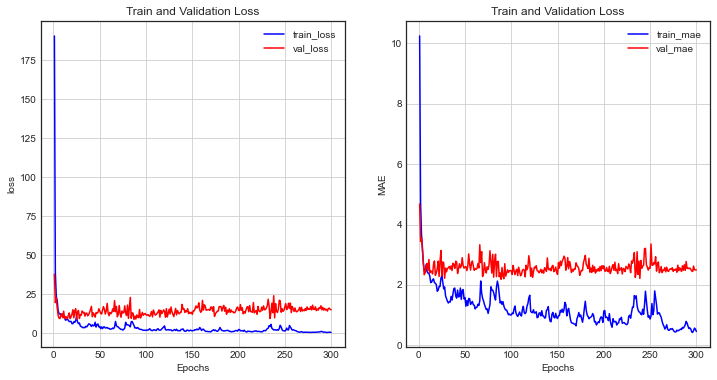

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs=range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax1 =fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 =fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color='blue', label='train_mae')
ax2.plot(epochs, val_mae, color='red', label='val_mae')
ax2.set_title('Train and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()